Files already downloaded and verified
Files already downloaded and verified
truck  deer truck  deer


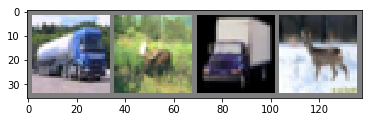

In [1]:
# 我们要按顺序做这几个步骤：
# 1. 1使用torchvision来读取并预处理CIFAR10数据集
# 2. 2定义一个卷积神经网络
# 3. 3定义一个代价函数
# 4. 4在神经网络中训练训练集数据
# 5. 5使用测试集数据测试神经网络

# 1.使用torchvision来读取并预处理CIFAR10数据集
# 使用torchvision读取CIFAR10相当的方便
import torch
import torchvision
import torchvision.transforms as transforms

# torchvision数据集的输出是在[0, 1]范围内的PILImage图片。
# 我们此处使用归一化的方法将其转化为Tensor，数据范围为[-1, 1]

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 我们来从中找几张图片看看
# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  2000] loss: 2.168
[1,  4000] loss: 1.852
[1,  6000] loss: 1.658
[1,  8000] loss: 1.590
[1, 10000] loss: 1.530
[1, 12000] loss: 1.462
[2,  2000] loss: 1.402
[2,  4000] loss: 1.375
[2,  6000] loss: 1.348
[2,  8000] loss: 1.328
[2, 10000] loss: 1.312
[2, 12000] loss: 1.285
Finished Training
GroundTruth:    cat  ship  ship plane


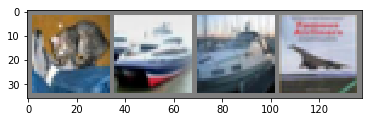

In [8]:
# 2. 定义一个卷积神经网络
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    """定义一个卷积神经网络"""
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


# 3. 定义代价函数和优化器
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # 使用交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)


# 4. 训练网络
from torch.autograd import Variable

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # warp them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backwrad + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')


# 让我们展示几张照片来熟悉一下
dataiter = iter(testloader)
images, labels = dataiter.next()

# print iamges
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [9]:
# 接下来看看神经网络如何看待这几个照片
outputs = net(Variable(images))

_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))

Predicted:    cat  ship  ship plane


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


In [10]:
# 看看神经网络在整个数据集上的表现结果如何。
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted== labels).sum()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 51 %


In [12]:
# 那么到底哪些类别表现良好又是哪些类别不太行呢？
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

RuntimeError: value cannot be converted to type uint8_t without overflow: 1000.000000

In [13]:
#在GPU上进行训练
net.cuda()

RuntimeError: torch.cuda.FloatTensor is not enabled.